In [1]:
import os
os.getcwd()
import os
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
#from scripts import graphs
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.options.display.max_colwidth = 100
import requests
import csv
import datetime
import matplotlib as mpl
import numpy as np
import math

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# The Data:

In [2]:
confirmed= pd.read_csv('provincial_cumulative_timeline_confirmed.csv')
recovered=pd.read_csv('covid19za_provincial_cumulative_timeline_recoveries.csv')
death=pd.read_csv('covid19za_provincial_cumulative_timeline_deaths.csv')
vacc=pd.read_csv('covid19za_provincial_cumulative_timeline_vaccination.csv')
testing= pd.read_csv('covid19za_provincial_cumulative_timeline_testing.csv')

In [3]:
confirmed.head()

,date,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total,source
0,5/3/20,20200305,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
1,7/3/20,20200307,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,NaN
2,8/3/20,20200308,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3,NaN
3,9/3/20,20200309,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,7,NaN
4,11/3/20,20200311,0.0,0.0,5.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,13,NaN


In [4]:
recovered.head()

,date,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total,source
0,17-04-2020,20200417,9,71,479.0,96,18,9,10,6,205,0,903.0,https://twitter.com/nicd_sa/status/1251215194765832194/photo/1
1,18-04-2020,20200418,9,71,479.0,96,18,9,10,6,205,0,903.0,https://twitter.com/nicd_sa/status/1251595223534362625/photo/1
2,19-04-2020,20200419,9,71,479.0,96,18,9,10,6,205,0,903.0,https://twitter.com/nicd_sa/status/1251927055224143875/photo/1
3,20-04-2020,20200420,15,74,545.0,151,21,14,13,6,216,0,1055.0,https://twitter.com/nicd_sa/status/1252309824412561408/photo/1
4,21-04-2020,20200421,15,74,545.0,151,21,14,13,6,216,0,1055.0,https://twitter.com/nicd_sa/status/1252643555690061824/photo/1


In [5]:
death.head()

,date,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total,source
0,27-03-2020,20200327,0,0,0,0,0,0,0,0,1,0,1,https://sacoronavirus.co.za/2020/03/27/latest-confirmed-cases-of-covid-19-27th-march-2020/
1,28-03-2020,20200328,0,0,0,1,0,0,0,0,1,0,2,NaN
2,30-03-2020,20200330,0,1,0,1,0,0,0,0,1,0,3,NaN
3,31-03-2020,20200331,0,1,1,2,0,0,0,0,1,0,5,NaN
4,03-04-2020,20200403,0,1,1,6,0,0,0,0,1,0,9,NaN


In [6]:
vacc.head()

,date,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,total,source
0,2021-02-17,20210217,5.0,12.0,27.0,42.0,NaN,NaN,20.0,NaN,58.0,164,https://sacoronavirus.co.za/latest-vaccine-statistics/
1,2021-02-18,20210218,96.0,272.0,392.0,408.0,NaN,NaN,196.0,268.0,345.0,1977,https://sacoronavirus.co.za/latest-vaccine-statistics/
2,2021-02-19,20210219,326.0,559.0,1399.0,1287.0,74.0,526.0,490.0,960.0,902.0,6523,https://sacoronavirus.co.za/latest-vaccine-statistics/
3,2021-02-20,20210220,NaN,NaN,1793.0,NaN,502.0,1399.0,579.0,1501.0,1626.0,9572,https://sacoronavirus.co.za/latest-vaccine-statistics/
4,2021-02-21,20210221,564.0,NaN,2735.0,NaN,1210.0,2576.0,830.0,2225.0,2455.0,14441,https://sacoronavirus.co.za/latest-vaccine-statistics/


In [7]:
testing.head()

,date,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total,source
0,27-04-2020,20200427,14054,6317,61830,28265,3691,4385,1314,2544,33335,12908,168643,ministerial briefing 26-04-2020
1,03-05-2020,20200503,24835,12634,85134,45955,5626,6691,1951,3565,53967,17183,257541,https://www.nicd.ac.za/wp-content/uploads/2020/05/Week-18-Weekly-Epidemiology-Brief-Template-V8.pdf
2,09-05-2020,20200509,34032,17231,111630,61801,7783,9823,3092,5213,70038,20693,341336,https://www.nicd.ac.za/wp-content/uploads/2020/05/NICD-Weekly-Epidemiological-Brief_-Week-ending...
3,13-05-2020,20200513,38122,19265,127030,67853,8239,11414,3683,5812,82865,22069,386352,https://twitter.com/bandilemasuku/status/1260910377493299201?s=20
4,20-05-2020,20200520,51888,24415,166394,86448,10579,14964,4776,8830,112612,25955,506681,https://twitter.com/GautengProvince/status/1263423900165246977/photo/1


# Cleaning the Data

In [8]:
confirmed.drop(['source'], axis='columns', inplace=True)
recovered.drop(['source'], axis='columns', inplace=True)
death.drop(['source'], axis='columns', inplace=True)
vacc.drop(['source'], axis='columns', inplace=True)
testing.drop(['source'], axis='columns', inplace=True)

In [9]:
confirmed.head()

,date,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total
0,5/3/20,20200305,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,7/3/20,20200307,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,8/3/20,20200308,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,9/3/20,20200309,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,11/3/20,20200311,0.0,0.0,5.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,13


In [10]:
confirmed.isnull().sum(axis = 0)

date        0
YYYYMMDD    0
EC          2
FS          2
GP          2
KZN         2
LP          2
MP          2
NC          2
NW          2
WC          2
UNKNOWN     2
total       0
dtype: int64

In [11]:
recovered.isnull().sum(axis = 0)

date        0
YYYYMMDD    0
EC          0
FS          0
GP          2
KZN         0
LP          0
MP          0
NC          0
NW          0
WC          0
UNKNOWN     0
total       3
dtype: int64

In [12]:
death.isnull().sum(axis = 0)

date        0
YYYYMMDD    0
EC          0
FS          0
GP          0
KZN         0
LP          0
MP          0
NC          0
NW          0
WC          0
UNKNOWN     0
total       0
dtype: int64

In [13]:
testing.isnull().sum(axis = 0)

date        0
YYYYMMDD    0
EC          0
FS          0
GP          0
KZN         0
LP          0
MP          0
NC          0
NW          0
WC          0
UNKNOWN     0
total       0
dtype: int64

In [14]:
vacc.isnull().sum(axis = 0)

date         0
YYYYMMDD     0
EC          19
FS          25
GP          12
KZN         22
LP          23
MP          22
NC          26
NW          18
WC          17
total        0
dtype: int64

In [15]:
confirmed2= confirmed.dropna()
confirmed2.isnull().sum(axis=0)

date        0
YYYYMMDD    0
EC          0
FS          0
GP          0
KZN         0
LP          0
MP          0
NC          0
NW          0
WC          0
UNKNOWN     0
total       0
dtype: int64

In [16]:
recovered2= recovered.dropna()
recovered2.isnull().sum(axis=0)

date        0
YYYYMMDD    0
EC          0
FS          0
GP          0
KZN         0
LP          0
MP          0
NC          0
NW          0
WC          0
UNKNOWN     0
total       0
dtype: int64

In [17]:
#vacc?missing value
vacc2= vacc.dropna()
vacc2.isnull().sum(axis=0)

date        0
YYYYMMDD    0
EC          0
FS          0
GP          0
KZN         0
LP          0
MP          0
NC          0
NW          0
WC          0
total       0
dtype: int64

In [18]:
vacc2.shape


(156, 12)

In [19]:
death.shape

(547, 13)

# Data visualization


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'EC'),
  Text(1, 0, 'FS'),
  Text(2, 0, 'GP'),
  Text(3, 0, 'KZN'),
  Text(4, 0, 'LP'),
  Text(5, 0, 'MP'),
  Text(6, 0, 'NC'),
  Text(7, 0, 'NW'),
  Text(8, 0, 'WC')])

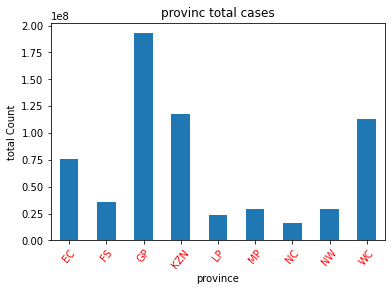

In [20]:
confirmed2[['EC','FS','GP','KZN','LP','MP','NC','NW','WC']].sum().plot.bar()
plt.title("provinc total cases")
plt.xlabel('province')
plt.ylabel('total Count')
plt.xticks(color='red', rotation=50)
#plt.grid()

In [21]:
confirmed2[['EC','FS','GP','KZN','LP','MP','NC','NW','WC']].sum()

EC      75751677.0
FS      35903893.0
GP     192853997.0
KZN    118124983.0
LP      23619632.0
MP      29476420.0
NC      16549414.0
NW      28833845.0
WC     112783047.0
dtype: float64

In [22]:

confirmed2.corr()
corr = confirmed2.corr()
corr.style.background_gradient(cmap='coolwarm')


,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total
YYYYMMDD,1.000000,0.893354,0.854657,0.824287,0.937635,0.896274,0.878291,0.840822,0.834806,0.900530,-0.400131,0.885511
EC,0.893354,1.000000,0.968904,0.925169,0.980621,0.927479,0.942307,0.932591,0.926729,0.973989,-0.423396,0.967819
FS,0.854657,0.968904,1.000000,0.973178,0.972389,0.962017,0.980647,0.986886,0.978241,0.977698,-0.435648,0.988822
GP,0.824287,0.925169,0.973178,1.000000,0.943170,0.979336,0.986081,0.981574,0.996465,0.972430,-0.357228,0.987104
KZN,0.937635,0.980621,0.972389,0.943170,1.000000,0.969196,0.974397,0.954079,0.950916,0.986847,-0.416713,0.983122
LP,0.896274,0.927479,0.962017,0.979336,0.969196,1.000000,0.995257,0.975678,0.986223,0.981908,-0.380350,0.987235
MP,0.878291,0.942307,0.980647,0.986081,0.974397,0.995257,1.000000,0.988928,0.993825,0.987431,-0.389359,0.994656
NC,0.840822,0.932591,0.986886,0.981574,0.954079,0.975678,0.988928,1.000000,0.991926,0.973661,-0.413299,0.985197
NW,0.834806,0.926729,0.978241,0.996465,0.950916,0.986223,0.993825,0.991926,1.000000,0.977938,-0.371983,0.989986
WC,0.900530,0.973989,0.977698,0.972430,0.986847,0.981908,0.987431,0.973661,0.977938,1.000000,-0.391033,0.995200


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'EC'),
  Text(1, 0, 'FS'),
  Text(2, 0, 'GP'),
  Text(3, 0, 'KZN'),
  Text(4, 0, 'LP'),
  Text(5, 0, 'MP'),
  Text(6, 0, 'NC'),
  Text(7, 0, 'NW'),
  Text(8, 0, 'WC')])

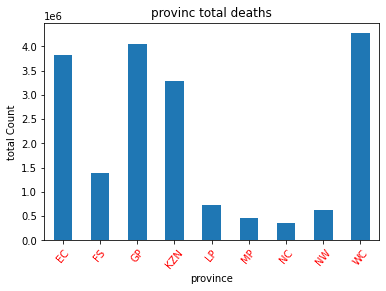

In [23]:
death[['EC','FS','GP','KZN','LP','MP','NC','NW','WC']].sum().plot.bar()
plt.title("provinc total deaths")
plt.xlabel('province')
plt.ylabel('total Count')
plt.xticks(color='red', rotation=50)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'EC'),
  Text(1, 0, 'FS'),
  Text(2, 0, 'GP'),
  Text(3, 0, 'KZN'),
  Text(4, 0, 'LP'),
  Text(5, 0, 'MP'),
  Text(6, 0, 'NC'),
  Text(7, 0, 'NW'),
  Text(8, 0, 'WC')])

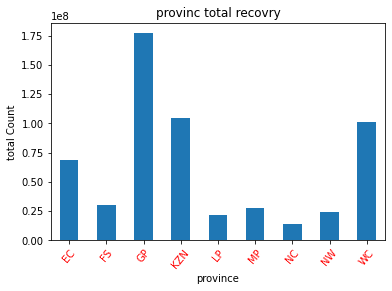

In [24]:
recovered2[['EC','FS','GP','KZN','LP','MP','NC','NW','WC']].sum().plot.bar()
plt.title("provinc total recovry")
plt.xlabel('province')
plt.ylabel('total Count')
plt.xticks(color='red', rotation=50)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'EC'),
  Text(1, 0, 'FS'),
  Text(2, 0, 'GP'),
  Text(3, 0, 'KZN'),
  Text(4, 0, 'LP'),
  Text(5, 0, 'MP'),
  Text(6, 0, 'NC'),
  Text(7, 0, 'NW'),
  Text(8, 0, 'WC')])

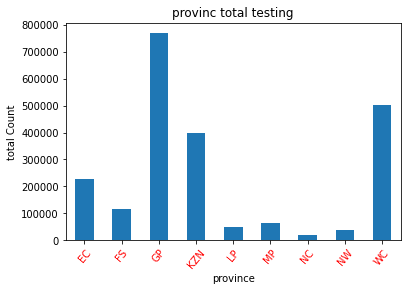

In [25]:
testing[['EC','FS','GP','KZN','LP','MP','NC','NW','WC']].sum().plot.bar()
plt.title("provinc total testing")
plt.xlabel('province')
plt.ylabel('total Count')
plt.xticks(color='red', rotation=50)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'EC'),
  Text(1, 0, 'FS'),
  Text(2, 0, 'GP'),
  Text(3, 0, 'KZN'),
  Text(4, 0, 'LP'),
  Text(5, 0, 'MP'),
  Text(6, 0, 'NC'),
  Text(7, 0, 'NW'),
  Text(8, 0, 'WC')])

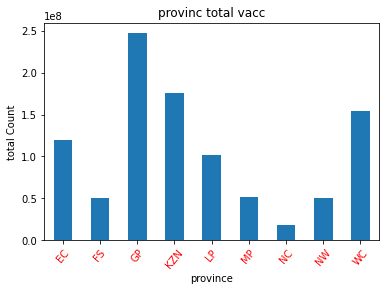

In [26]:
vacc2[['EC','FS','GP','KZN','LP','MP','NC','NW','WC']].sum().plot.bar()
plt.title("provinc total vacc")
plt.xlabel('province')
plt.ylabel('total Count')
plt.xticks(color='red', rotation=50)

In [27]:
#fig = plt.figure(figsize=[15,8]);
#cov_date = pd.Series(confirmed2.total.values, index=confirmed2.date)
#plt.xlabel('Date')
#plt.tick_params(axis='x', rotation=70)
#plt.ylabel('Number of infections')
#plt.title('Cumulative total infections', fontsize=20)
#for index, row in confirmed2.iterrows():
    #plt.annotate('{}'.format(row['total']), xy=(row['date'], row['total']), xytext=(-5, 5), ha='right',xycoords=, arrowprops=dict(arrowstyle='->', shrinkA=0))
   # plt.text(row['date'],row['total'],row['total'])
#plt.plot(cov_date, 'o-')

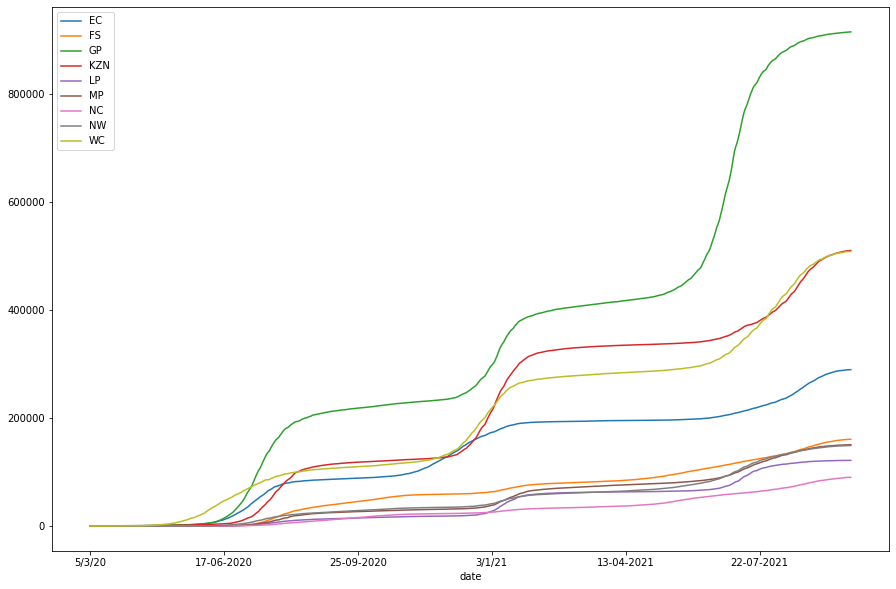

In [28]:
confirmed2.plot(x="date", y=['EC','FS','GP','KZN','LP','MP','NC','NW','WC'],figsize=[15,10])
plt.show()

findfont: Font family ['Graphik'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Graphik'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Graphik'] not found. Falling back to DejaVu Sans.


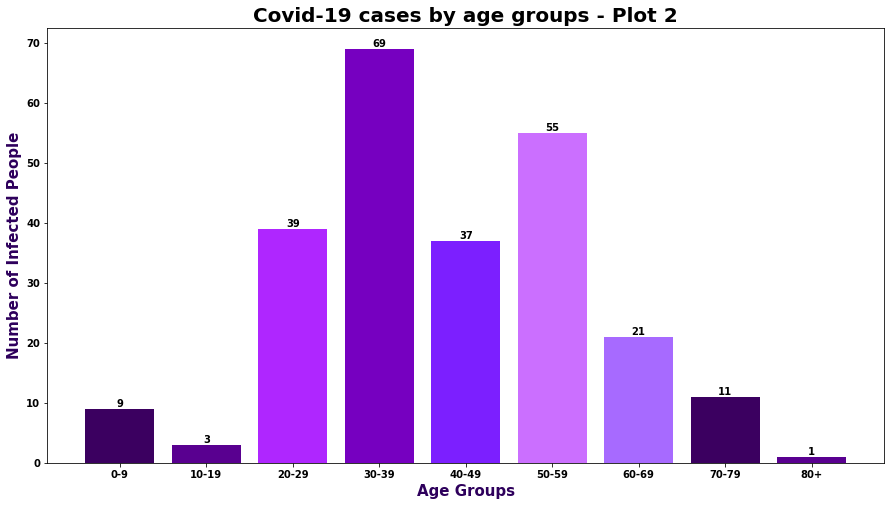

In [29]:
from collections import Counter

fig = plt.figure(figsize=[15,8]);
#Read in CSV and Group Data
countAG= {                                                #dictionary to store the number of people per age group
    "0-9": 0,
    "10-19":0,
    "20-29":0,
    "30-39":0,
    "40-49":0,
    "50-59":0,
    "60-69":0,
    "70-79":0,
    "80+":0
}

df= pd.read_csv('covid19za_timeline_confirmed.csv')        #read in csv file
ageCount= Counter(df['age'])                               #count the number of people per age (who are positive)

for i in ageCount:                                         #group each age into an age range and sum it
    if (i in range(0,9)):
        countAG["0-9"]= ageCount[i]+ countAG["0-9"]
    elif (i in range(10,19)):
        countAG["10-19"]= ageCount[i]+ countAG["10-19"]
    elif (i in range(20,29)):
        countAG["20-29"]= ageCount[i]+ countAG["20-29"]
    elif (i in range(30,39)):
        countAG["30-39"]= ageCount[i]+ countAG["30-39"]
    elif (i in range(40,49)):
        countAG["40-49"]= ageCount[i]+ countAG["40-49"]
    elif (i in range(50,59)):
        countAG["50-59"]= ageCount[i]+ countAG["50-59"]
    elif (i in range(60,69)):
        countAG["60-69"]= ageCount[i]+ countAG["60-69"]
    elif (i in range(70,79)):
        countAG["70-79"]= ageCount[i]+ countAG["70-79"]  
    elif (i >= 80):
        countAG["80+"]= ageCount[i]+ countAG["80+"]

#Start With Graph Plotting

plt.rcParams['font.family'] = 'Graphik'                        #Specify font 
plt.bar(range(len(countAG)), list(countAG.values()), color= ["#3b0060","#590090","#af26ff","#7600c0","#7c1fff","#cb6fff" ,"#a76aff","#3b0060","#590090"], align='center')  #Accenture colours added
plt.xticks(range(len(countAG)), list(countAG.keys()),fontweight='black')
plt.yticks(fontweight='black')

plt.xlabel('Age Groups', fontsize= 15,fontweight='black', color= "#2e005c")
plt.ylabel('Number of Infected People',fontsize= 15,fontweight='black', color= "#2e005c")
plt.title('Covid-19 cases by age groups - Plot 2',fontsize= 20,fontweight='black')
plt.rcParams['axes.linewidth']=0.8
#plt.grid(b=True, color='k', linestyle=':', lw=.5, zorder=1)   #Optional grid lines

xs=[0,1,2,3,4,5,6,7,8]                                         #Necessary to form x,y pair

for x,y in zip(xs,list(countAG.values())):

    label = y

    plt.annotate(label,                                        # this is the text
                 (x,y),                                        # this is the point to label
                 textcoords="offset points",                   # how to position the text
                 xytext=(0,2),                                 # distance from text to points (x,y)
                 ha='center',                                  # horizontal alignment can be left, right or center
                 fontweight='black')  

In [30]:
confirmed_gender= pd.read_csv('covid19za_timeline_confirmed.csv')

In [31]:
confirmed_gender.head()

,case_id,date,YYYYMMDD,country,province,geo_subdivision,age,gender,transmission_type,type
0,1,5/3/20,20200305,South Africa,KZN,ZA-KZN,38.0,male,Travelled to Italy,travel
1,2,7/3/20,20200307,South Africa,GP,ZA-GP,39.0,female,Travelled to Italy,travel
2,3,8/3/20,20200308,South Africa,KZN,ZA-KZN,38.0,female,Travelled to Italy,travel
3,4,9/3/20,20200309,South Africa,KZN,ZA-KZN,38.0,male,Travelled to Italy,travel
4,5,9/3/20,20200309,South Africa,KZN,ZA-KZN,38.0,female,Travelled to Italy,travel


In [32]:
confirmed_gender.isnull().sum(axis = 0)

case_id                0
date                   0
YYYYMMDD               0
country                0
province               0
geo_subdivision        0
age                  436
gender                 0
transmission_type    435
type                   0
dtype: int64

In [33]:
gender = confirmed_gender.gender
gender

0               male
1             female
2             female
3               male
4             female
           ...      
704    not specified
705    not specified
706    not specified
707    not specified
708    not specified
Name: gender, Length: 709, dtype: object

In [34]:
gender.value_counts().reset_index()

,index,gender
0,not specified,440
1,male,169
2,female,100


findfont: Font family ['Graphik'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Graphik'] not found. Falling back to DejaVu Sans.


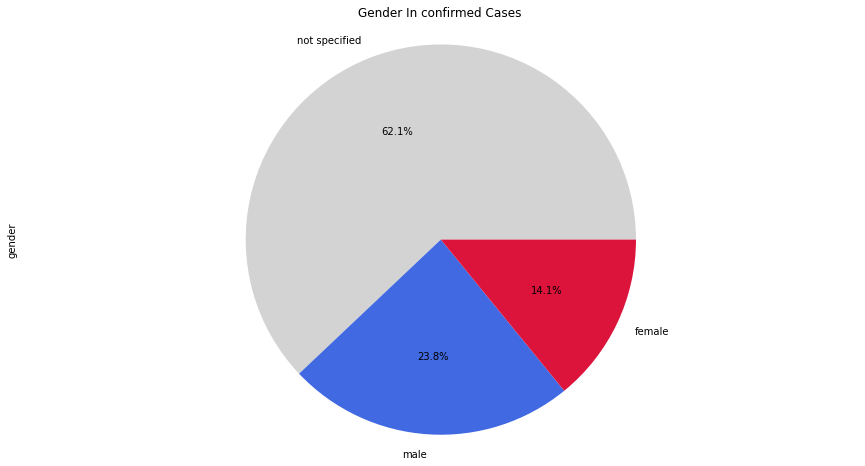

In [35]:
import matplotlib.font_manager
from collections import Counter
colors = ['lightgray', 'royalblue','crimson']
confirmed_gender['gender'].value_counts().plot.pie(autopct='%1.1f%%',colors= colors,figsize=[15,8])
plt.title('Gender In confirmed Cases')
plt.axis('equal')
plt.show()

In [36]:
def load_timeseries(name):
    #base_url='https://github.com/dsfsi/covid19za/blob/master/data'
    #url = f'{base_url}/covid19za_timeline_{name}.csv'
    #csv = requests.get(url).text
    #print(csv)
    df = pd.read_csv(name)
    print(df.head())
    df = (df.set_index('date'))
    df.index = pd.to_datetime(df.index,dayfirst=True)
    
    return df

dff = load_timeseries('covid19za_timeline_confirmed.csv')


   case_id    date  YYYYMMDD       country province geo_subdivision   age  \
0        1  5/3/20  20200305  South Africa      KZN          ZA-KZN  38.0   
1        2  7/3/20  20200307  South Africa       GP           ZA-GP  39.0   
2        3  8/3/20  20200308  South Africa      KZN          ZA-KZN  38.0   
3        4  9/3/20  20200309  South Africa      KZN          ZA-KZN  38.0   
4        5  9/3/20  20200309  South Africa      KZN          ZA-KZN  38.0   

   gender   transmission_type    type  
0    male  Travelled to Italy  travel  
1  female  Travelled to Italy  travel  
2  female  Travelled to Italy  travel  
3    male  Travelled to Italy  travel  
4  female  Travelled to Italy  travel  


In [37]:
dff.head()

,case_id,YYYYMMDD,country,province,geo_subdivision,age,gender,transmission_type,type
date,,,,,,,,,
2020-03-05,1,20200305,South Africa,KZN,ZA-KZN,38.0,male,Travelled to Italy,travel
2020-03-07,2,20200307,South Africa,GP,ZA-GP,39.0,female,Travelled to Italy,travel
2020-03-08,3,20200308,South Africa,KZN,ZA-KZN,38.0,female,Travelled to Italy,travel
2020-03-09,4,20200309,South Africa,KZN,ZA-KZN,38.0,male,Travelled to Italy,travel
2020-03-09,5,20200309,South Africa,KZN,ZA-KZN,38.0,female,Travelled to Italy,travel


In [38]:
def plot_confirmed(provinces, min_cases=100, ls='-'):
    for province in provinces:
        
        df1 = dff.loc[(dff.province == province)].groupby(['date']).agg({'country': ['count']})
        df1.columns = ['new cases']
        df1['cummulative'] = df1['new cases'].cumsum()
        (df1.reset_index()['cummulative']
            .plot(label=province, ls=ls))
        print('\n' + province +":")
        print(df1)

In [39]:
c=pd.read_csv('covid19za_timeline_confirmed.csv')

In [40]:
#c.head()
#c.isnull().sum(axis = 0)


In [41]:
from sklearn import preprocessing

gender=preprocessing.LabelEncoder()
gender.fit(c['gender'])
c['newGender'] = gender.transform(c['gender'])

In [42]:
c.head()

,case_id,date,YYYYMMDD,country,province,geo_subdivision,age,gender,transmission_type,type,newGender
0,1,5/3/20,20200305,South Africa,KZN,ZA-KZN,38.0,male,Travelled to Italy,travel,1
1,2,7/3/20,20200307,South Africa,GP,ZA-GP,39.0,female,Travelled to Italy,travel,0
2,3,8/3/20,20200308,South Africa,KZN,ZA-KZN,38.0,female,Travelled to Italy,travel,0
3,4,9/3/20,20200309,South Africa,KZN,ZA-KZN,38.0,male,Travelled to Italy,travel,1
4,5,9/3/20,20200309,South Africa,KZN,ZA-KZN,38.0,female,Travelled to Italy,travel,0


In [43]:
corl = c.corr()
corl.style.background_gradient(cmap='coolwarm')



,case_id,YYYYMMDD,age,newGender
case_id,1.000000,0.883711,0.049141,0.756980
YYYYMMDD,0.883711,1.000000,0.028992,0.716001
age,0.049141,0.028992,1.000000,0.050268
newGender,0.756980,0.716001,0.050268,1.000000


<AxesSubplot:>

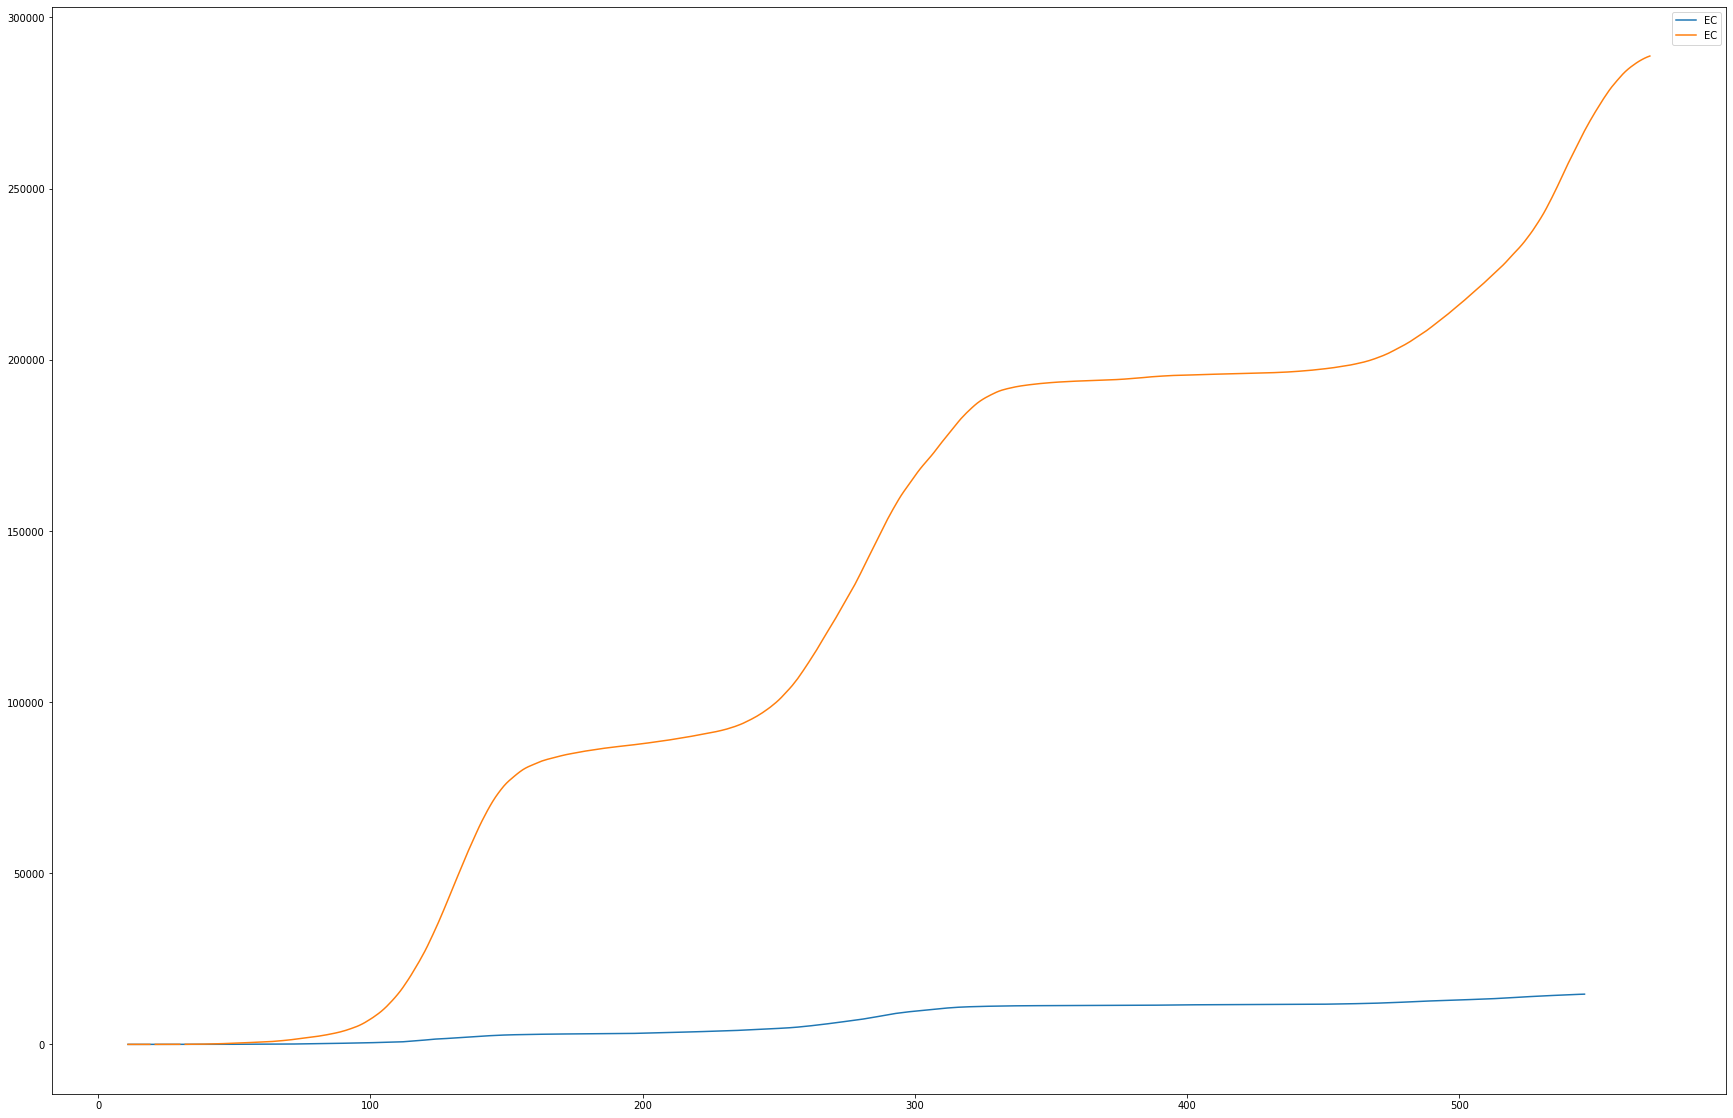

In [44]:
colors = ['lightgray', 'royalblue']
pd.concat([death['EC'].rolling(12).mean(), confirmed2['EC'].rolling (12) .mean()], axis=1).plot(figsize=(30,20))


In [45]:
death.head()

,date,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total
0,27-03-2020,20200327,0,0,0,0,0,0,0,0,1,0,1
1,28-03-2020,20200328,0,0,0,1,0,0,0,0,1,0,2
2,30-03-2020,20200330,0,1,0,1,0,0,0,0,1,0,3
3,31-03-2020,20200331,0,1,1,2,0,0,0,0,1,0,5
4,03-04-2020,20200403,0,1,1,6,0,0,0,0,1,0,9


In [46]:
death.tail()

,date,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total
542,24-09-2021,20210924,14724,6630,19302,14505,3949,1957,2168,4085,19647,0,86967
543,25-09-2021,20210925,14733,6630,19302,14507,3949,1959,2170,4085,19666,0,87001
544,26-09-2021,20210926,14741,6657,19306,14512,3949,1959,2170,4085,19673,0,87052
545,27-09-2021,20210927,14765,6677,19340,14517,4004,1963,2176,4085,19689,0,87216
546,28-09-2021,20210928,14797,6688,19365,14551,4004,1966,2182,4144,19720,0,87417


# Predicting The deaths cases by state:

In [47]:
X=death['YYYYMMDD'].values.reshape(-1, 1)
y=death['EC'].values.reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=death['YYYYMMDD'].values.reshape(-1, 1),y=death['EC'].values.reshape(-1, 1))
model.score(X,y)

0.9150859394153104

In [48]:
model.predict([[20211019]])

array([[12383.08495767]])

# Predicting deaths in the state (FS)

In [49]:
X=death['YYYYMMDD'].values.reshape(-1, 1)
y=death['FS'].values.reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=death['YYYYMMDD'].values.reshape(-1, 1),y=death['FS'].values.reshape(-1, 1))
model.score(X,y)

0.7862800665537859

In [50]:
model.predict([[20211019]])

array([[4612.78539461]])

# 



# Predicting deaths in the state (GP)

In [51]:
X=death['YYYYMMDD'].values.reshape(-1, 1)
y=death['GP'].values.reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model_GP_death= LinearRegression()
model_GP_death.fit(X=death['YYYYMMDD'].values.reshape(-1, 1),y=death['GP'].values.reshape(-1, 1))
model_GP_death.score(X,y)

0.7532577532693269

In [52]:
model_GP_death.predict([[20211019]])

array([[13030.23554728]])

# 

# Predicting deaths in the state (KZN)

In [53]:
X=death['YYYYMMDD'].values.reshape(-1, 1)
y=death['KZN'].values.reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model_KZN_death= LinearRegression()
model_KZN_death.fit(X=death['YYYYMMDD'].values.reshape(-1, 1),y=death['KZN'].values.reshape(-1, 1))
model_KZN_death.score(X,y)

0.891518119343215

In [54]:
model_KZN_death.predict([[20211019]])

array([[11026.9077299]])

# 

# Predicting deaths in the state (LP)

In [55]:
X=death['YYYYMMDD'].values.reshape(-1, 1)
y=death['LP'].values.reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=death['YYYYMMDD'].values.reshape(-1, 1),y=death['LP'].values.reshape(-1, 1))
model.score(X,y)

0.7814682068197261

In [56]:
model.predict([[20211020]])

array([[2605.90866336]])

# 

# Predicting deaths in the state (MP)

In [57]:
X=death['YYYYMMDD'].values.reshape(-1, 1)
y=death['MP'].values.reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=death['YYYYMMDD'].values.reshape(-1, 1),y=death['MP'].values.reshape(-1, 1))
model.score(X,y)

0.8258757791135342

In [58]:
model.predict([[20211019]])

array([[1497.11936491]])

# 

# Predicting deaths in the state (NC)

In [59]:
X=death['YYYYMMDD'].values.reshape(-1, 1)
y=death['NC'].values.reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=death['YYYYMMDD'].values.reshape(-1, 1),y=death['NC'].values.reshape(-1, 1))
model.score(X,y)

0.6829141789295725

In [60]:
model.predict([[20211019]])

array([[1232.79311752]])

# 

# Predicting deaths in the state (NW)

In [61]:
X=death['YYYYMMDD'].values.reshape(-1, 1)
y=death['NW'].values.reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=death['YYYYMMDD'].values.reshape(-1, 1),y=death['NW'].values.reshape(-1, 1))
model.score(X,y)

0.6549460703065058

In [62]:
model.predict([[20211019]])

array([[2199.49426342]])

# 

# Predicting deaths in the state (WC)

In [63]:
X=death['YYYYMMDD'].values.reshape(-1, 1)
y=death['WC'].values.reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model_WC_death= LinearRegression()
model_WC_death.fit(X=death['YYYYMMDD'].values.reshape(-1, 1),y=death['WC'].values.reshape(-1, 1))
model_WC_death.score(X,y)

0.8325902873208966

In [64]:
model.predict([[20211019]])

array([[2199.49426342]])

# 

In [65]:
confirmed2.head()

,date,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total
0,5/3/20,20200305,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,7/3/20,20200307,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,8/3/20,20200308,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,9/3/20,20200309,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,11/3/20,20200311,0.0,0.0,5.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,13


In [66]:
confirmed2.tail()

,date,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total
566,24-09-2021,20210924,289351.0,160453.0,915326.0,509715.0,121729.0,150502.0,89938.0,149027.0,508302.0,0.0,2894343
567,25-09-2021,20210925,289583.0,160584.0,915527.0,510065.0,121742.0,150578.0,90198.0,149100.0,508600.0,0.0,2895977
568,26-09-2021,20210926,289752.0,160679.0,915609.0,510337.0,121752.0,150647.0,90272.0,149181.0,508715.0,0.0,2896944
569,27-09-2021,20210927,289801.0,160765.0,915716.0,510463.0,121761.0,150671.0,90307.0,149229.0,508808.0,0.0,2897522
570,28-09-2021,20210928,289987.0,160934.0,915906.0,510835.0,121785.0,150726.0,90382.0,149285.0,509049.0,0.0,2898889


# confirmed cases of covid-19 in Sauth Arican by State:


# Cases that will become confirmed cases of covid-19 in the state of (EC)

In [67]:
X=confirmed2['YYYYMMDD'].values.reshape(-1, 1)
y=confirmed2['EC'].values.reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=confirmed2['YYYYMMDD'].values.reshape(-1, 1),y=confirmed2['EC'].values.reshape(-1, 1))
model.score(X,y)

0.7980815432397507

In [68]:
model.predict([[20211019]])

array([[222136.94703537]])

# 

# Cases that will become confirmed cases of covid-19 in the state of (FS)


In [69]:
X=confirmed2['YYYYMMDD'].values.reshape(-1, 1)
y=confirmed2['FS'].values.reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=confirmed2['YYYYMMDD'].values.reshape(-1, 1),y=confirmed2['FS'].values.reshape(-1, 1))
model.score(X,y)

0.7304392574846502

In [70]:
model.predict([[20211019]])

array([[109188.49435705]])

# 

# Cases that will become confirm cases of covid-19 in the state of (GP)


In [71]:
X=confirmed2['YYYYMMDD'].values.reshape(-1, 1)
y=confirmed2['GP'].values.reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model_GP_cofirmed2= LinearRegression()
model_GP_cofirmed2.fit(X=confirmed2['YYYYMMDD'].values.reshape(-1, 1),y=confirmed2['GP'].values.reshape(-1, 1))
model_GP_cofirmed2.score(X,y)

0.6794497084510831

In [72]:
model_GP_cofirmed2.predict([[20211019]])

array([[600631.34735775]])

# 

# Cases that will become confirmed cases of covid-19 in the state of (KNZ)


In [73]:
X=confirmed2['YYYYMMDD'].values.reshape(-1, 1)
y=confirmed2['KZN'].values.reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model_KZN_confirmed2= LinearRegression()
model_KZN_confirmed2.fit(X=confirmed2['YYYYMMDD'].values.reshape(-1, 1),y=confirmed2['KZN'].values.reshape(-1, 1))
model_KZN_confirmed2.score(X,y)

0.879159788141866

In [74]:
model_KZN_confirmed2.predict([[20211019]])

array([[379220.49933946]])

# 

# Cases that will become confirmed cases of covid-19 in the state of (LP)


In [75]:
X=confirmed2['YYYYMMDD'].values.reshape(-1, 1)
y=confirmed2['LP'].values.reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=confirmed2['YYYYMMDD'].values.reshape(-1, 1),y=confirmed2['LP'].values.reshape(-1, 1))
model.score(X,y)

0.8033077584686594

In [76]:
model.predict([[20211019]])

array([[81862.99270421]])

# 

# Cases that will become confirmed cases of covid-19 in the state of (MP)



In [77]:
X=confirmed2['YYYYMMDD'].values.reshape(-1, 1)
y=confirmed2['MP'].values.reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=confirmed2['YYYYMMDD'].values.reshape(-1, 1),y=confirmed2['MP'].values.reshape(-1, 1))
model.score(X,y)

0.7713950506107682

In [78]:
model.predict([[20211019]])

array([[97466.91273808]])

# 

# Cases that will become confirmed cases of covid-19 in the state of (NC)




In [79]:
X=confirmed2['YYYYMMDD'].values.reshape(-1, 1)
y=confirmed2['NC'].values.reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=confirmed2['YYYYMMDD'].values.reshape(-1, 1),y=confirmed2['NC'].values.reshape(-1, 1))
model.score(X,y)

0.7069813817577333

In [80]:
model.predict([[20211019]])

array([[53780.50400716]])

# 

# Cases that will become confirmed cases of covid-19 in the state of (NW)


In [81]:
X=confirmed2['YYYYMMDD'].values.reshape(-1, 1)
y=confirmed2['NW'].values.reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=confirmed2['YYYYMMDD'].values.reshape(-1, 1),y=confirmed2['NW'].values.reshape(-1, 1))
model.score(X,y)

0.6969013601697

In [82]:
model.predict([[20211019]])

array([[92557.0546619]])

# 

# Cases that will become confirmed cases of covid-19 in the state of (WC)


In [83]:
X=confirmed2['YYYYMMDD'].values.reshape(-1, 1)
y=confirmed2['WC'].values.reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model_WC_cofirmed2= LinearRegression()
model_WC_cofirmed2.fit(X=confirmed2['YYYYMMDD'].values.reshape(-1, 1),y=confirmed2['WC'].values.reshape(-1, 1))
model_WC_cofirmed2.score(X,y)

0.8109535657304366

In [84]:
model_WC_cofirmed2.predict([[20211019]])

array([[348214.54220784]])

# 

# predictive vaccination covid-19 in Sauth Arican by State:




## predictive vaccination in (WC)

In [85]:
X=vacc2['YYYYMMDD'].values.reshape(-1, 1)
y=vacc2['WC'].values.reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model_WC_vacc2= LinearRegression()
model_WC_vacc2.fit(X=vacc2['YYYYMMDD'].values.reshape(-1, 1),y=vacc2['WC'].values.reshape(-1, 1))
model_WC_vacc2.score(X,y)

0.7831129244165536

In [86]:
model_WC_vacc2.predict([[20211019]])

array([[2425952.30079651]])

# predictive vaccination in (MP)

In [87]:
X=vacc2['YYYYMMDD'].values.reshape(-1, 1)
y=vacc2['MP'].values.reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=vacc2['YYYYMMDD'].values.reshape(-1, 1),y=vacc2['MP'].values.reshape(-1, 1))
model.score(X,y)

0.7814289726199961

In [88]:
model.predict([[20211019]])

array([[809680.61668015]])

# predictive vaccination in (EC)


In [89]:
X=vacc2['YYYYMMDD'].values.reshape(-1, 1)
y=vacc2['EC'].values.reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=vacc2['YYYYMMDD'].values.reshape(-1, 1),y=vacc2['EC'].values.reshape(-1, 1))
model.score(X,y)

0.802151334615098

In [90]:
model.predict([[20211019]])

array([[1872817.37644958]])

## predictive vaccination in (FS)


In [91]:
X=vacc2['YYYYMMDD'].values.reshape(-1, 1)
y=vacc2['FS'].values.reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=vacc2['YYYYMMDD'].values.reshape(-1, 1),y=vacc2['FS'].values.reshape(-1, 1))
model.score(X,y)

0.7971441562493327

In [92]:
model.predict([[20211019]])

array([[795574.8078537]])

## predictive vaccination in (KZN)


In [93]:
X=vacc2['YYYYMMDD'].values.reshape(-1, 1)
y=vacc2['KZN'].values.reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model_KZN_vacc2= LinearRegression()
model_KZN_vacc2.fit(X=vacc2['YYYYMMDD'].values.reshape(-1, 1),y=vacc2['KZN'].values.reshape(-1, 1))
model_KZN_vacc2.score(X,y)

0.851734569058063

In [94]:
model_KZN_vacc2.predict([[20211019]])

array([[2649388.68452454]])

## predictive vaccination in (NC)



In [95]:
X=vacc2['YYYYMMDD'].values.reshape(-1, 1)
y=vacc2['GP'].values.reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model_GP_vacc2= LinearRegression()
model_GP_vacc2.fit(X=vacc2['YYYYMMDD'].values.reshape(-1, 1),y=vacc2['GP'].values.reshape(-1, 1))
model_GP_vacc2.score(X,y)

0.7900981054529451

In [96]:
model_GP_vacc2.predict([[20211019]])

array([[3880179.95065308]])

## predictive vaccination in (LP)



In [97]:
X=vacc2['YYYYMMDD'].values.reshape(-1, 1)
y=vacc2['LP'].values.reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=vacc2['YYYYMMDD'].values.reshape(-1, 1),y=vacc2['LP'].values.reshape(-1, 1))
model.score(X,y)

0.8200941638107806

In [98]:
model.predict([[20211019]])

array([[1585209.96923828]])

## predictive vaccination in (NC)



In [99]:
X=vacc2['YYYYMMDD'].values.reshape(-1, 1)
y=vacc2['NC'].values.reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=vacc2['YYYYMMDD'].values.reshape(-1, 1),y=vacc2['NC'].values.reshape(-1, 1))
model.score(X,y)

0.7573974852636586

In [100]:
model.predict([[20211019]])

array([[285909.84767723]])

## predictive vaccination in (NW)



In [101]:
X=vacc2['YYYYMMDD'].values.reshape(-1, 1)
y=vacc2['NW'].values.reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=vacc2['YYYYMMDD'].values.reshape(-1, 1),y=vacc2['NW'].values.reshape(-1, 1))
model.score(X,y)

0.776956630171956

In [102]:
model.predict([[20211019]])
model.predict([[2022112]])

array([[-2.4900575e+10]])

In [103]:
import datetime

# Predictive Confrimed cases on  covid-19 in Sauth Arican:




# Using Machine learning model to predicate the Death cases on south africa for 09/29/2021 TO10/08/2021 

In [104]:
corona_sorted_df=death

In [105]:
corona_sorted_df['Date'] = pd.to_datetime(corona_sorted_df['YYYYMMDD'], format='%Y%m%d')

In [106]:

corona_sorted_df = corona_sorted_df.sort_values(
    'Date', ascending=False)

In [107]:
corona_sorted_df.head()

,date,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total,Date
546,28-09-2021,20210928,14797,6688,19365,14551,4004,1966,2182,4144,19720,0,87417,2021-09-28
545,27-09-2021,20210927,14765,6677,19340,14517,4004,1963,2176,4085,19689,0,87216,2021-09-27
544,26-09-2021,20210926,14741,6657,19306,14512,3949,1959,2170,4085,19673,0,87052,2021-09-26
543,25-09-2021,20210925,14733,6630,19302,14507,3949,1959,2170,4085,19666,0,87001,2021-09-25
542,24-09-2021,20210924,14724,6630,19302,14505,3949,1957,2168,4085,19647,0,86967,2021-09-24


In [108]:
corona_sorted_df.shape

(547, 14)

In [109]:
corona_sorted_df.index

Int64Index([546, 545, 544, 543, 542, 541, 540, 539, 538, 537,
            ...
              9,   8,   7,   6,   5,   4,   3,   2,   1,   0],
           dtype='int64', length=547)

In [110]:
corona_cases_per_day=corona_sorted_df

In [111]:
corona_cases_per_day.describe().T

,count,mean,std,min,25%,50%,75%,max
YYYYMMDD,547.0,2.020562e+07,4861.400035,20200327.0,20200814.5,20201229.0,20210514.5,20210928.0
EC,547.0,6.971931e+03,5093.272034,0.0,2444.5,7171.0,11615.0,14797.0
FS,547.0,2.524724e+03,2120.276633,0.0,504.5,2163.0,4013.5,6688.0
GP,547.0,7.386512e+03,5855.066356,0.0,2877.5,5424.0,10855.0,19365.0
KZN,547.0,6.007982e+03,4786.120094,0.0,1634.0,4134.0,10450.0,14551.0
LP,547.0,1.327150e+03,1302.238162,0.0,150.0,556.0,2336.0,4004.0
MP,547.0,8.462925e+02,644.831121,0.0,189.0,640.0,1414.0,1966.0
NC,547.0,6.410274e+02,644.769679,0.0,94.0,379.0,969.0,2182.0
NW,547.0,1.139366e+03,1179.488415,0.0,176.0,577.0,1798.0,4144.0
WC,547.0,7.808042e+03,5611.523552,1.0,3547.0,6524.0,11703.0,19720.0


In [112]:
corona_cases_per_day.head()

,date,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total,Date
546,28-09-2021,20210928,14797,6688,19365,14551,4004,1966,2182,4144,19720,0,87417,2021-09-28
545,27-09-2021,20210927,14765,6677,19340,14517,4004,1963,2176,4085,19689,0,87216,2021-09-27
544,26-09-2021,20210926,14741,6657,19306,14512,3949,1959,2170,4085,19673,0,87052,2021-09-26
543,25-09-2021,20210925,14733,6630,19302,14507,3949,1959,2170,4085,19666,0,87001,2021-09-25
542,24-09-2021,20210924,14724,6630,19302,14505,3949,1957,2168,4085,19647,0,86967,2021-09-24


Blue : Confirmed Cases 


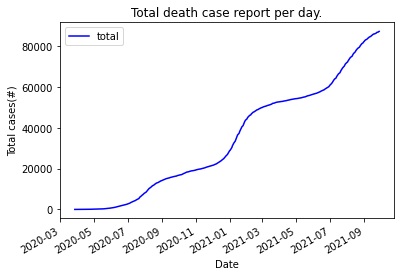

In [114]:

x = corona_cases_per_day.Date
y = corona_cases_per_day.total

ax = plt.gca()
corona_cases_per_day.plot(kind='line', x='Date',
                          y='total', color='blue', ax=ax)

print("Blue : Death Cases ")

plt.ylabel('Total cases(#)')
plt.title('Total death case report per day.')
plt.show()

# Converting Date column of dataset to numeric for ensuring the independent variable 

In [115]:

corona_index_df = pd.DataFrame(corona_cases_per_day.index)
corona_confirmed_df = pd.DataFrame(corona_cases_per_day.total)


# Prepare dataset for model


In [117]:

x_days_train = corona_index_df[0:]
x_days_validate = corona_index_df[100:200]
x_days_test = corona_index_df[200:]

# Confirmed
y_confirmed_train = corona_confirmed_df[0:]
y_confirmed_validate = corona_confirmed_df[100:200]
y_confirmed_test = corona_confirmed_df[200:]

In [118]:
corona_index_df.shape

(547, 1)

# Bulid the Linear regression model 

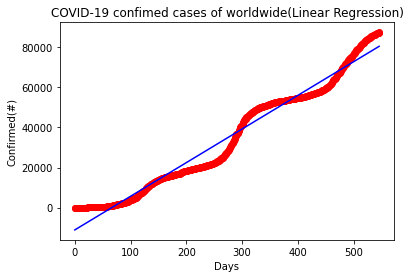

In [119]:

ln_model = LinearRegression()
ln_model.fit(x_days_train, y_confirmed_train)

plt.scatter(x_days_train, y_confirmed_train, color='red')
plt.plot(x_days_train, ln_model.predict(x_days_train), color='blue')
plt.title('COVID-19 confimed cases of worldwide(Linear Regression)')
plt.xlabel('Days')
plt.ylabel('Confirmed(#)')
plt.show()

# Linear Regession  R2 Score

In [120]:

print('Linear Regession  R2 Score   : ',
      r2_score(y_confirmed_train, ln_model.predict(x_days_train)))
rmse = np.sqrt(mean_squared_error(
    y_confirmed_train, ln_model.predict(x_days_train)))
print('RMSE of Linear regression is :', rmse)

Linear Regession  R2 Score   :  0.9696980585340924
RMSE of Linear regression is : 4678.092086454448


# Predict the Death cases of the data.

In [121]:

y_pred = ln_model.predict(x_days_validate)
result = pd.DataFrame(y_pred)
result['Real Value'] = y_confirmed_validate.iloc[:, :].values
result['Predicted Value'] = pd.DataFrame(y_pred)
result = result[['Real Value', 'Predicted Value']]
print(result)

    Real Value  Predicted Value
0        58702     63646.940281
1        58590     63479.347301
2        58441     63311.754320
3        58323     63144.161340
4        58223     62976.568359
..         ...              ...
95       51634     47725.607138
96       51560     47558.014157
97       51421     47390.421177
98       51326     47222.828196
99       51261     47055.235216

[100 rows x 2 columns]


In [122]:
 DateTopred = pd.DataFrame()
    

# Predicate the Death cases on south africa for 09/29/2021 TO10/08/2021

In [123]:
DateTopred['Dates']=pd.date_range(start='09/29/2021', end='10/08/2021')

In [124]:
DateTopred.index

RangeIndex(start=0, stop=10, step=1)

In [125]:
corona_Predect_index_df = pd.DataFrame(DateTopred.index)

In [126]:
x_days_test.index

RangeIndex(start=200, stop=547, step=1)

In [127]:
DateTopred.head(10)

,Dates
0,2021-09-29
1,2021-09-30
2,2021-10-01
3,2021-10-02
4,2021-10-03
5,2021-10-04
6,2021-10-05
7,2021-10-06
8,2021-10-07
9,2021-10-08


In [130]:
y_confirmed_test_pred1 = ln_model.predict(corona_Predect_index_df)
predicted_result = pd.DataFrame(y_confirmed_test_pred1)
predicted_result['Date'] = DateTopred.iloc[:, :]
predicted_result['Predicted Value'] = pd.DataFrame(y_confirmed_test_pred1).abs().round(0)
predicted_result = predicted_result[[
    'Date', 'Predicted Value']]
print(predicted_result)

        Date  Predicted Value
0 2021-09-29          11100.0
1 2021-09-30          10932.0
2 2021-10-01          10764.0
3 2021-10-02          10597.0
4 2021-10-03          10429.0
5 2021-10-04          10262.0
6 2021-10-05          10094.0
7 2021-10-06           9926.0
8 2021-10-07           9759.0
9 2021-10-08           9591.0


In [131]:
predicted_result.to_csv('predected_values/predicted_death_result.csv',index=False)